In [1]:
import sys
import numpy as np

import plotly
import plotly.offline as offline
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


### 微分

/mnt/c/Git/go/anaconda3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:372: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




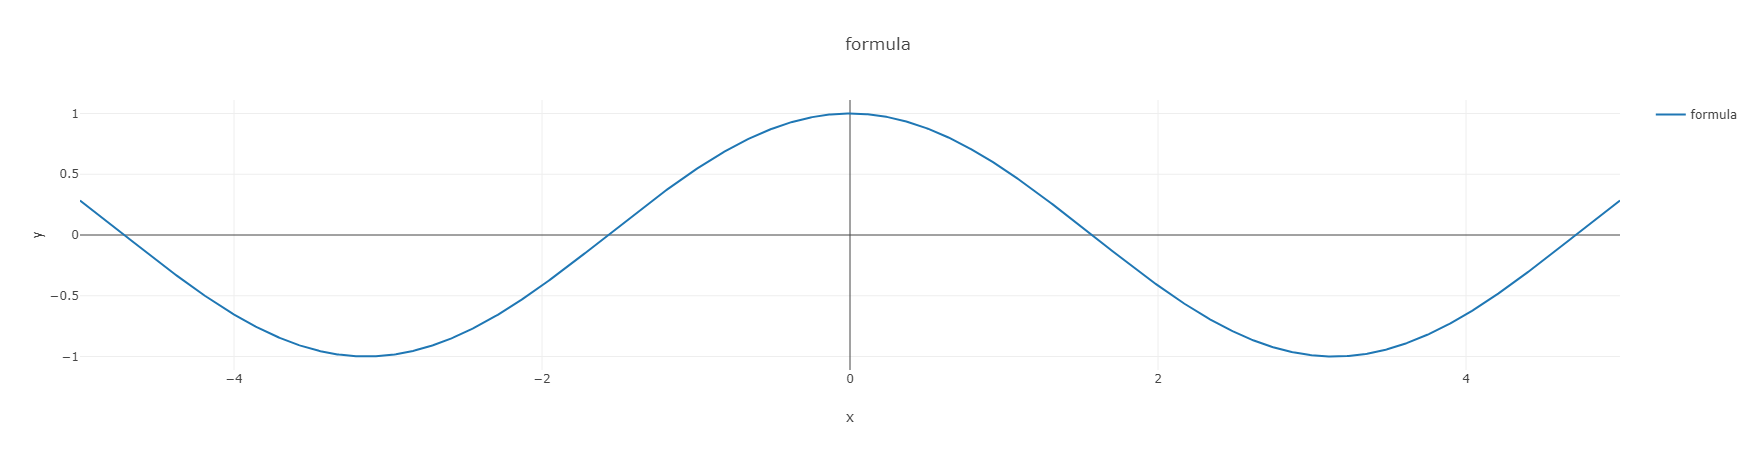

In [76]:
import sympy as sym
(x, y) = sym.symbols('x y')

# 2次関数
def f2(v):
    return x**2

# 3次関数
def f3(v):
    return x**3

# sin波
def sin():
    return sym.sin(x)

name = 'formula'
title = 'formula'
X = np.linspace(-5, 5, 1000)
Y = np.array([])


is_differential = [True, False][0]
for i in X:
    
    if is_differential:
        Y = np.append(Y, float(sym.diff(sin(), x, 1).subs(x, i)))
    else:
        Y = np.append(Y, float(sin().subs(x, i)))
    
trace = go.Line(
    x = X,
    y = Y,
    name = name
)

layout = go.Layout(
    title=title,
#     legend={"x":0.8, "y":0.1},
    xaxis={"title":"x"},
    yaxis={"title":"y"},
    showlegend=True
#     yaxis2={"title":"Birth Rate", "overlaying":"y", "side":"right"},
)

data = [trace]
fig = {'data':data, 'layout':layout}
offline.iplot(fig, filename='sin', image="png")

### 勾配

In [ ]:
def gradient(f, *varargs, **kwargs):
    """
    Return the gradient of an N-dimensional array.

    The gradient is computed using second order accurate central differences
    in the interior points and either first or second order accurate one-sides
    (forward or backwards) differences at the boundaries.
    The returned gradient hence has the same shape as the input array.

    Parameters
    ----------
    f : array_like
        An N-dimensional array containing samples of a scalar function.
    varargs : list of scalar or array, optional
        Spacing between f values. Default unitary spacing for all dimensions.
        Spacing can be specified using:

        1. single scalar to specify a sample distance for all dimensions.
        2. N scalars to specify a constant sample distance for each dimension.
           i.e. `dx`, `dy`, `dz`, ...
        3. N arrays to specify the coordinates of the values along each
           dimension of F. The length of the array must match the size of
           the corresponding dimension
        4. Any combination of N scalars/arrays with the meaning of 2. and 3.

        If `axis` is given, the number of varargs must equal the number of axes.
        Default: 1.

    edge_order : {1, 2}, optional
        Gradient is calculated using N-th order accurate differences
        at the boundaries. Default: 1.

        .. versionadded:: 1.9.1

    axis : None or int or tuple of ints, optional
        Gradient is calculated only along the given axis or axes
        The default (axis = None) is to calculate the gradient for all the axes
        of the input array. axis may be negative, in which case it counts from
        the last to the first axis.

        .. versionadded:: 1.11.0

    Returns
    -------
    gradient : ndarray or list of ndarray
        A set of ndarrays (or a single ndarray if there is only one dimension)
        corresponding to the derivatives of f with respect to each dimension.
        Each derivative has the same shape as f.

    Examples
    --------
    >>> f = np.array([1, 2, 4, 7, 11, 16], dtype=np.float)
    >>> np.gradient(f)
    array([ 1. ,  1.5,  2.5,  3.5,  4.5,  5. ])
    >>> np.gradient(f, 2)
    array([ 0.5 ,  0.75,  1.25,  1.75,  2.25,  2.5 ])

    Spacing can be also specified with an array that represents the coordinates
    of the values F along the dimensions.
    For instance a uniform spacing:

    >>> x = np.arange(f.size)
    >>> np.gradient(f, x)
    array([ 1. ,  1.5,  2.5,  3.5,  4.5,  5. ])

    Or a non uniform one:

    >>> x = np.array([0., 1., 1.5, 3.5, 4., 6.], dtype=np.float)
    >>> np.gradient(f, x)
    array([ 1. ,  3. ,  3.5,  6.7,  6.9,  2.5])

    For two dimensional arrays, the return will be two arrays ordered by
    axis. In this example the first array stands for the gradient in
    rows and the second one in columns direction:

    >>> np.gradient(np.array([[1, 2, 6], [3, 4, 5]], dtype=np.float))
    [array([[ 2.,  2., -1.],
            [ 2.,  2., -1.]]), array([[ 1. ,  2.5,  4. ],
            [ 1. ,  1. ,  1. ]])]

    In this example the spacing is also specified:
    uniform for axis=0 and non uniform for axis=1

    >>> dx = 2.
    >>> y = [1., 1.5, 3.5]
    >>> np.gradient(np.array([[1, 2, 6], [3, 4, 5]], dtype=np.float), dx, y)
    [array([[ 1. ,  1. , -0.5],
            [ 1. ,  1. , -0.5]]), array([[ 2. ,  2. ,  2. ],
            [ 2. ,  1.7,  0.5]])]

    It is possible to specify how boundaries are treated using `edge_order`

    >>> x = np.array([0, 1, 2, 3, 4])
    >>> f = x**2
    >>> np.gradient(f, edge_order=1)
    array([ 1.,  2.,  4.,  6.,  7.])
    >>> np.gradient(f, edge_order=2)
    array([-0.,  2.,  4.,  6.,  8.])

    The `axis` keyword can be used to specify a subset of axes of which the
    gradient is calculated

    >>> np.gradient(np.array([[1, 2, 6], [3, 4, 5]], dtype=np.float), axis=0)
    array([[ 2.,  2., -1.],
           [ 2.,  2., -1.]])

    Notes
    -----
    Assuming that :math:`f\\in C^{3}` (i.e., :math:`f` has at least 3 continuous
    derivatives) and let be :math:`h_{*}` a non homogeneous stepsize, the
    spacing the finite difference coefficients are computed by minimising
    the consistency error :math:`\\eta_{i}`:

    .. math::

        \\eta_{i} = f_{i}^{\\left(1\\right)} -
                    \\left[ \\alpha f\\left(x_{i}\\right) +
                            \\beta f\\left(x_{i} + h_{d}\\right) +
                            \\gamma f\\left(x_{i}-h_{s}\\right)
                    \\right]

    By substituting :math:`f(x_{i} + h_{d})` and :math:`f(x_{i} - h_{s})`
    with their Taylor series expansion, this translates into solving
    the following the linear system:

    .. math::

        \\left\\{
            \\begin{array}{r}
                \\alpha+\\beta+\\gamma=0 \\\\
                -\\beta h_{d}+\\gamma h_{s}=1 \\\\
                \\beta h_{d}^{2}+\\gamma h_{s}^{2}=0
            \\end{array}
        \\right.

    The resulting approximation of :math:`f_{i}^{(1)}` is the following:

    .. math::

        \\hat f_{i}^{(1)} =
            \\frac{
                h_{s}^{2}f\\left(x_{i} + h_{d}\\right)
                + \\left(h_{d}^{2} - h_{s}^{2}\\right)f\\left(x_{i}\\right)
                - h_{d}^{2}f\\left(x_{i}-h_{s}\\right)}
                { h_{s}h_{d}\\left(h_{d} + h_{s}\\right)}
            + \\mathcal{O}\\left(\\frac{h_{d}h_{s}^{2}
                                + h_{s}h_{d}^{2}}{h_{d}
                                + h_{s}}\\right)

    It is worth noting that if :math:`h_{s}=h_{d}`
    (i.e., data are evenly spaced)
    we find the standard second order approximation:

    .. math::

        \\hat f_{i}^{(1)}=
            \\frac{f\\left(x_{i+1}\\right) - f\\left(x_{i-1}\\right)}{2h}
            + \\mathcal{O}\\left(h^{2}\\right)

    With a similar procedure the forward/backward approximations used for
    boundaries can be derived.

    References
    ----------
    .. [1]  Quarteroni A., Sacco R., Saleri F. (2007) Numerical Mathematics
            (Texts in Applied Mathematics). New York: Springer.
    .. [2]  Durran D. R. (1999) Numerical Methods for Wave Equations
            in Geophysical Fluid Dynamics. New York: Springer.
    .. [3]  Fornberg B. (1988) Generation of Finite Difference Formulas on
            Arbitrarily Spaced Grids,
            Mathematics of Computation 51, no. 184 : 699-706.
            `PDF <http://www.ams.org/journals/mcom/1988-51-184/
            S0025-5718-1988-0935077-0/S0025-5718-1988-0935077-0.pdf>`_.
    """
    f = np.asanyarray(f)
    N = f.ndim  # number of dimensions

    axes = kwargs.pop('axis', None)
    if axes is None:
        axes = tuple(range(N))
    else:
        axes = _nx.normalize_axis_tuple(axes, N)

    len_axes = len(axes)
    n = len(varargs)
    if n == 0:
        # no spacing argument - use 1 in all axes
        dx = [1.0] * len_axes
    elif n == 1 and np.ndim(varargs[0]) == 0:
        # single scalar for all axes
        dx = varargs * len_axes
    elif n == len_axes:
        # scalar or 1d array for each axis
        dx = list(varargs)
        for i, distances in enumerate(dx):
            if np.ndim(distances) == 0:
                continue
            elif np.ndim(distances) != 1:
                raise ValueError("distances must be either scalars or 1d")
            if len(distances) != f.shape[axes[i]]:
                raise ValueError("when 1d, distances must match "
                                 "the length of the corresponding dimension")
            diffx = np.diff(distances)
            # if distances are constant reduce to the scalar case
            # since it brings a consistent speedup
            if (diffx == diffx[0]).all():
                diffx = diffx[0]
            dx[i] = diffx
    else:
        raise TypeError("invalid number of arguments")

    edge_order = kwargs.pop('edge_order', 1)
    if kwargs:
        raise TypeError('"{}" are not valid keyword arguments.'.format(
                                                  '", "'.join(kwargs.keys())))
    if edge_order > 2:
        raise ValueError("'edge_order' greater than 2 not supported")

    # use central differences on interior and one-sided differences on the
    # endpoints. This preserves second order-accuracy over the full domain.

    outvals = []

    # create slice objects --- initially all are [:, :, ..., :]
    slice1 = [slice(None)]*N
    slice2 = [slice(None)]*N
    slice3 = [slice(None)]*N
    slice4 = [slice(None)]*N

    otype = f.dtype.char
    if otype not in ['f', 'd', 'F', 'D', 'm', 'M']:
        otype = 'd'

    # Difference of datetime64 elements results in timedelta64
    if otype == 'M':
        # Need to use the full dtype name because it contains unit information
        otype = f.dtype.name.replace('datetime', 'timedelta')
    elif otype == 'm':
        # Needs to keep the specific units, can't be a general unit
        otype = f.dtype

    # Convert datetime64 data into ints. Make dummy variable `y`
    # that is a view of ints if the data is datetime64, otherwise
    # just set y equal to the array `f`.
    if f.dtype.char in ["M", "m"]:
        y = f.view('int64')
    else:
        y = f

    for i, axis in enumerate(axes):
        if y.shape[axis] < edge_order + 1:
            raise ValueError(
                "Shape of array too small to calculate a numerical gradient, "
                "at least (edge_order + 1) elements are required.")
        # result allocation
        out = np.empty_like(y, dtype=otype)

        uniform_spacing = np.ndim(dx[i]) == 0

        # Numerical differentiation: 2nd order interior
        slice1[axis] = slice(1, -1)
        slice2[axis] = slice(None, -2)
        slice3[axis] = slice(1, -1)
        slice4[axis] = slice(2, None)

        if uniform_spacing:
            out[slice1] = (f[slice4] - f[slice2]) / (2. * dx[i])
        else:
            dx1 = dx[i][0:-1]
            dx2 = dx[i][1:]
            a = -(dx2)/(dx1 * (dx1 + dx2))
            b = (dx2 - dx1) / (dx1 * dx2)
            c = dx1 / (dx2 * (dx1 + dx2))
            # fix the shape for broadcasting
            shape = np.ones(N, dtype=int)
            shape[axis] = -1
            a.shape = b.shape = c.shape = shape
            # 1D equivalent -- out[1:-1] = a * f[:-2] + b * f[1:-1] + c * f[2:]
            out[slice1] = a * f[slice2] + b * f[slice3] + c * f[slice4]

        # Numerical differentiation: 1st order edges
        if edge_order == 1:
            slice1[axis] = 0
            slice2[axis] = 1
            slice3[axis] = 0
            dx_0 = dx[i] if uniform_spacing else dx[i][0]
            # 1D equivalent -- out[0] = (y[1] - y[0]) / (x[1] - x[0])
            out[slice1] = (y[slice2] - y[slice3]) / dx_0

            slice1[axis] = -1
            slice2[axis] = -1
            slice3[axis] = -2
            dx_n = dx[i] if uniform_spacing else dx[i][-1]
            # 1D equivalent -- out[-1] = (y[-1] - y[-2]) / (x[-1] - x[-2])
            out[slice1] = (y[slice2] - y[slice3]) / dx_n

        # Numerical differentiation: 2nd order edges
        else:
            slice1[axis] = 0
            slice2[axis] = 0
            slice3[axis] = 1
            slice4[axis] = 2
            if uniform_spacing:
                a = -1.5 / dx[i]
                b = 2. / dx[i]
                c = -0.5 / dx[i]
            else:
                dx1 = dx[i][0]
                dx2 = dx[i][1]
                a = -(2. * dx1 + dx2)/(dx1 * (dx1 + dx2))
                b = (dx1 + dx2) / (dx1 * dx2)
                c = - dx1 / (dx2 * (dx1 + dx2))
            # 1D equivalent -- out[0] = a * y[0] + b * y[1] + c * y[2]
            out[slice1] = a * y[slice2] + b * y[slice3] + c * y[slice4]

            slice1[axis] = -1
            slice2[axis] = -3
            slice3[axis] = -2
            slice4[axis] = -1
            if uniform_spacing:
                a = 0.5 / dx[i]
                b = -2. / dx[i]
                c = 1.5 / dx[i]
            else:
                dx1 = dx[i][-2]
                dx2 = dx[i][-1]
                a = (dx2) / (dx1 * (dx1 + dx2))
                b = - (dx2 + dx1) / (dx1 * dx2)
                c = (2. * dx2 + dx1) / (dx2 * (dx1 + dx2))
            # 1D equivalent -- out[-1] = a * f[-3] + b * f[-2] + c * f[-1]
            out[slice1] = a * y[slice2] + b * y[slice3] + c * y[slice4]

        outvals.append(out)

        # reset the slice object in this dimension to ":"
        slice1[axis] = slice(None)
        slice2[axis] = slice(None)
        slice3[axis] = slice(None)
        slice4[axis] = slice(None)

    if len_axes == 1:
        return outvals[0]
    else:
        return outvals


### テイラー展開